In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


I used The Valentine's Day Consumer data from the 2024 TidyTuesday datasets and it represents Valentine's Day Consumer Data from the National Retail Federation in the United States conducts surveys. It contains 3 different datasets as below 
1. historical_spending.csv
2. gifts_age.csv
3. gifts_gender.csv


A. Percentage of People celebrating Valentine's Day per Year
------------------------------------------------------------

In [2]:
Vals_day = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-02-13/historical_spending.csv', 
     show_col_types = FALSE
)


In [3]:
Vals_day #|> head()

Year,PercentCelebrating,PerPerson,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,60,103.00,8.60,12.33,21.52,5.91,23.76,10.93,8.42
2011,58,116.21,10.75,12.62,26.18,8.09,24.86,12.00,11.21
2012,59,126.03,10.85,13.49,29.60,6.93,25.66,10.42,8.43
2013,60,130.97,11.64,13.48,30.94,8.32,27.93,11.46,10.23
2014,54,133.91,10.80,15.00,30.58,7.97,27.48,13.37,9.00
2015,55,142.31,12.70,15.72,36.30,7.87,27.27,14.72,11.05
2016,55,146.84,13.11,14.78,33.11,8.52,33.46,15.05,12.52
2017,54,136.57,12.68,14.63,32.32,7.36,28.46,13.91,10.23
2018,55,143.56,13.12,14.75,34.10,6.55,26.96,14.04,11.04


In [4]:
options(repr.plot.width = 10)


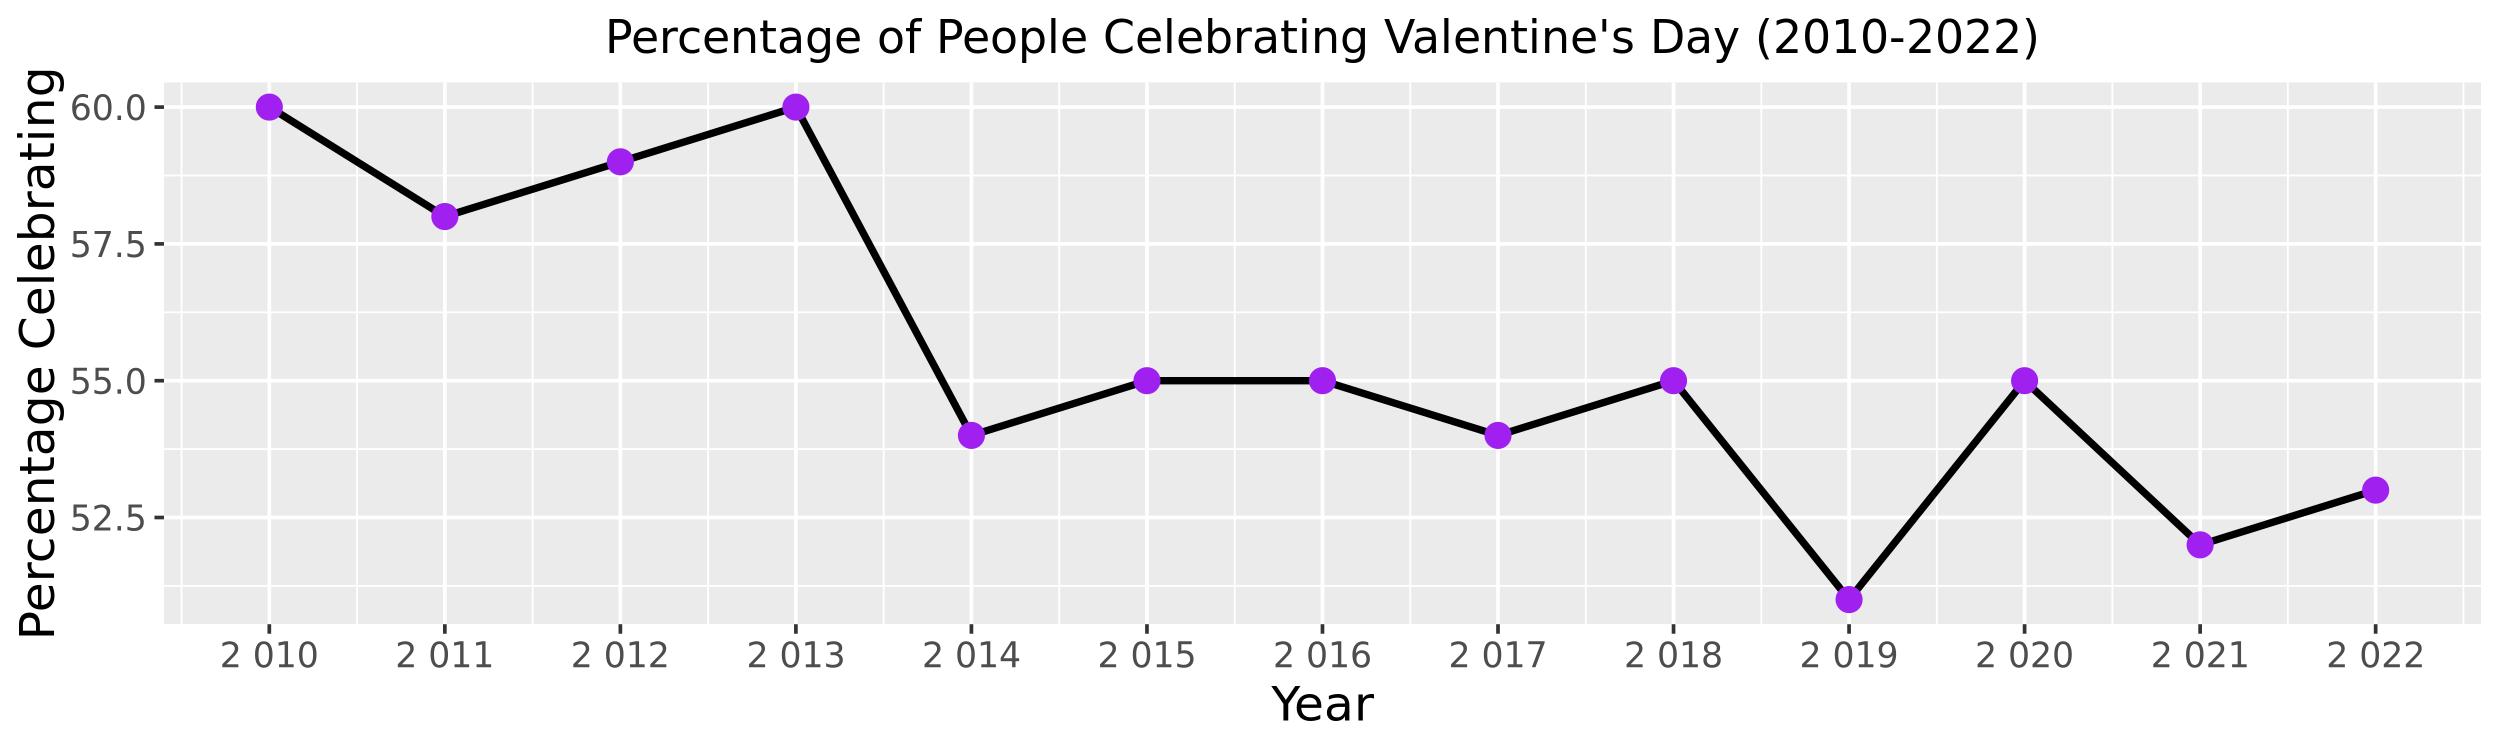

In [5]:
Vals_day |>
  ggplot(aes(x = Year, y = PercentCelebrating)) +
  geom_line(color = "black", linewidth = 1) +
  geom_point(color = "purple", size = 3) +
  labs(
    title = "Percentage of People Celebrating Valentine's Day (2010-2022)",
    x = "Year",  
    y = "Percentage Celebrating"  
  ) +
  scale_x_continuous(
    breaks = seq(2010, 2022, by = 1),  
    labels = scales::label_number(accuracy = 1)  
  ) +
  theme(
    plot.title = element_text(hjust = 0.5),  
    axis.text.x = element_text(size = 10),  
    axis.text.y = element_text(size = 10),   
    axis.ticks = element_line(linewidth = 0.5),
    axis.title.x = element_text(size = 14),  
    axis.title.y = element_text(size = 14)
  )


Above is a line chart showing the percentage of people celebrating Valentine's Day from 2010 to 2022.
**Key Insights:**
- There is a gradual decline in the percentage of people celebrating Valentine's Day over the years.
- The drop is most noticeable after 2013, with fluctuations but no recovery to earlier levels.
- This trend might indicate changing social habits, economic factors, or reduced interest in the holiday.

B. Percentage of People Celebrating Valentine's Day by Age Group
----------------------------------------------------------------

In [6]:
gifts_age = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-02-13/gifts_age.csv')

Rows: 6 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Age
dbl (8): SpendingCelebrating, Candy, Flowers, Jewelry, GreetingCards, Evenin...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
gifts_age

Age,SpendingCelebrating,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18-24,51,70,50,33,33,41,33,23
25-34,40,62,44,34,33,37,27,19
35-44,31,58,41,29,42,30,26,22
45-54,19,60,37,20,42,31,20,23
55-64,18,50,32,13,43,29,19,20
65+,13,42,25,8,44,24,12,20


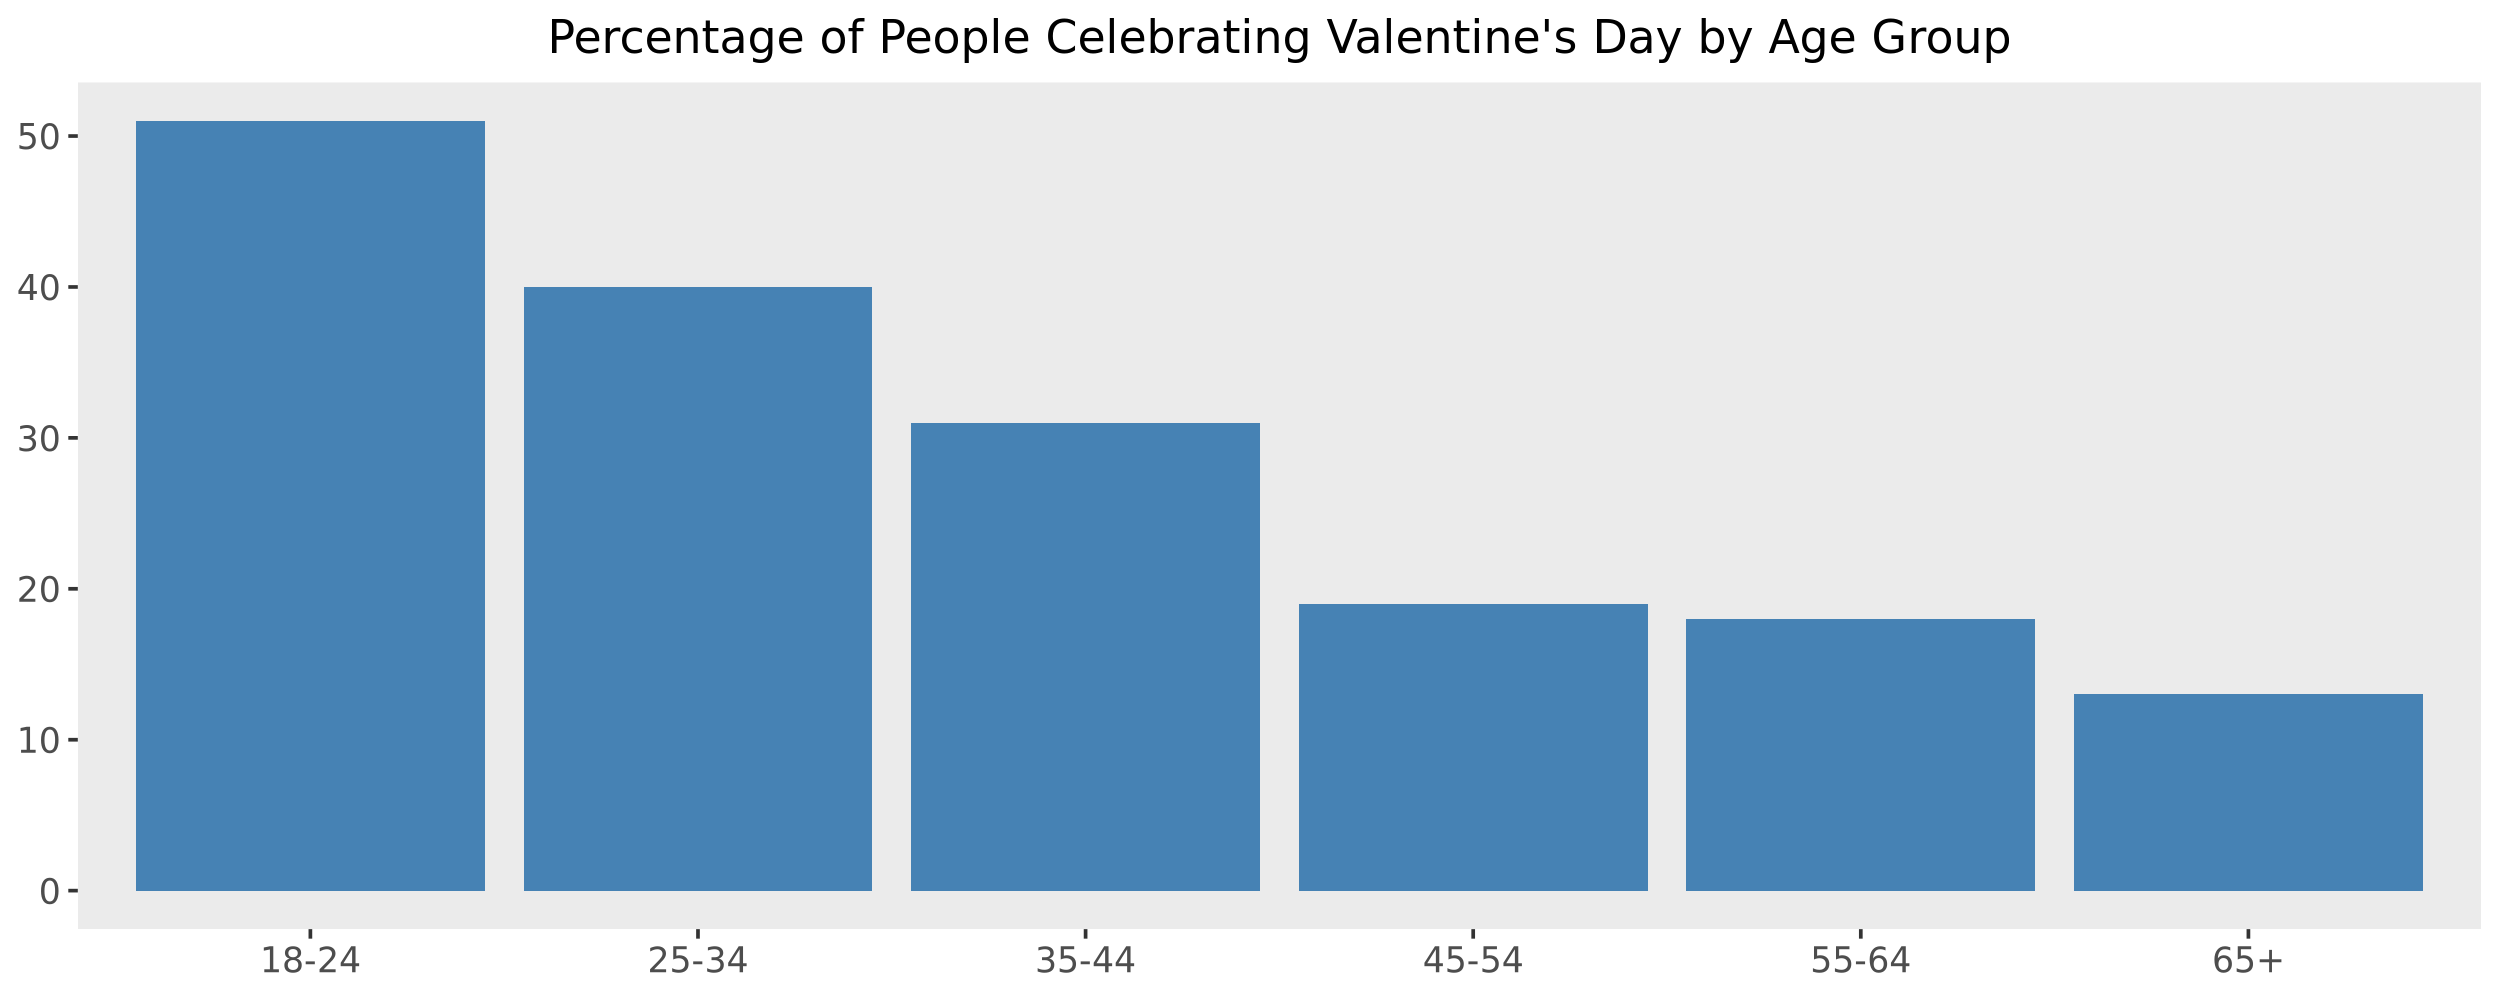

In [8]:
options(repr.plot.height = 4)
gifts_age |>
  ggplot(aes(x = Age, y = SpendingCelebrating)) +
  geom_bar(stat = "identity", fill = "steel blue", show.legend = FALSE) +
  labs(
    title = "Percentage of People Celebrating Valentine's Day by Age Group",
    x = NULL,
    y = NULL
  ) +
  #theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5),
       panel.grid = element_blank(),
    axis.text.x = element_text(size = 10),  
    axis.text.y = element_text(size = 10),   
    axis.ticks = element_line(linewidth = 0.5),   
    axis.title.x = element_text(size = 14),  
    axis.title.y = element_text(size = 14)
       ) #+
#coord_flip()


The bar chart shows the percentage of people celebrating Valentine's Day for each age group.
From the bar chart
- Younger age groups (18–24 and 25–34) are more likely to celebrate Valentine's Day.
- Celebration percentages decline steadily with age, with the lowest participation in the 65+ group.
- This might reflect cultural norms where younger people view Valentine’s Day as more significant or demographic factors like higher disposable income among younger adults.

In [9]:
gifts_category <- gifts_age |>
  pivot_longer(
    cols = Candy:GiftCards,  
    names_to = "GiftCategory",
    values_to = "Percentage"
  )

top_gift_categories <- gifts_category |>
  group_by(GiftCategory) |>
  summarise(TotalPercentage = sum(Percentage, na.rm = TRUE)) |>
  arrange(desc(TotalPercentage)) |>
  slice(1:3)  

gifts_top3 <- gifts_category |>
  filter(GiftCategory %in% top_gift_categories$GiftCategory)



Age,GiftCategory,Percentage
<chr>,<chr>,<dbl>
18-24,Candy,70
18-24,Flowers,50
18-24,GreetingCards,33
25-34,Candy,62
25-34,Flowers,44
25-34,GreetingCards,33
35-44,Candy,58
35-44,Flowers,41
35-44,GreetingCards,42


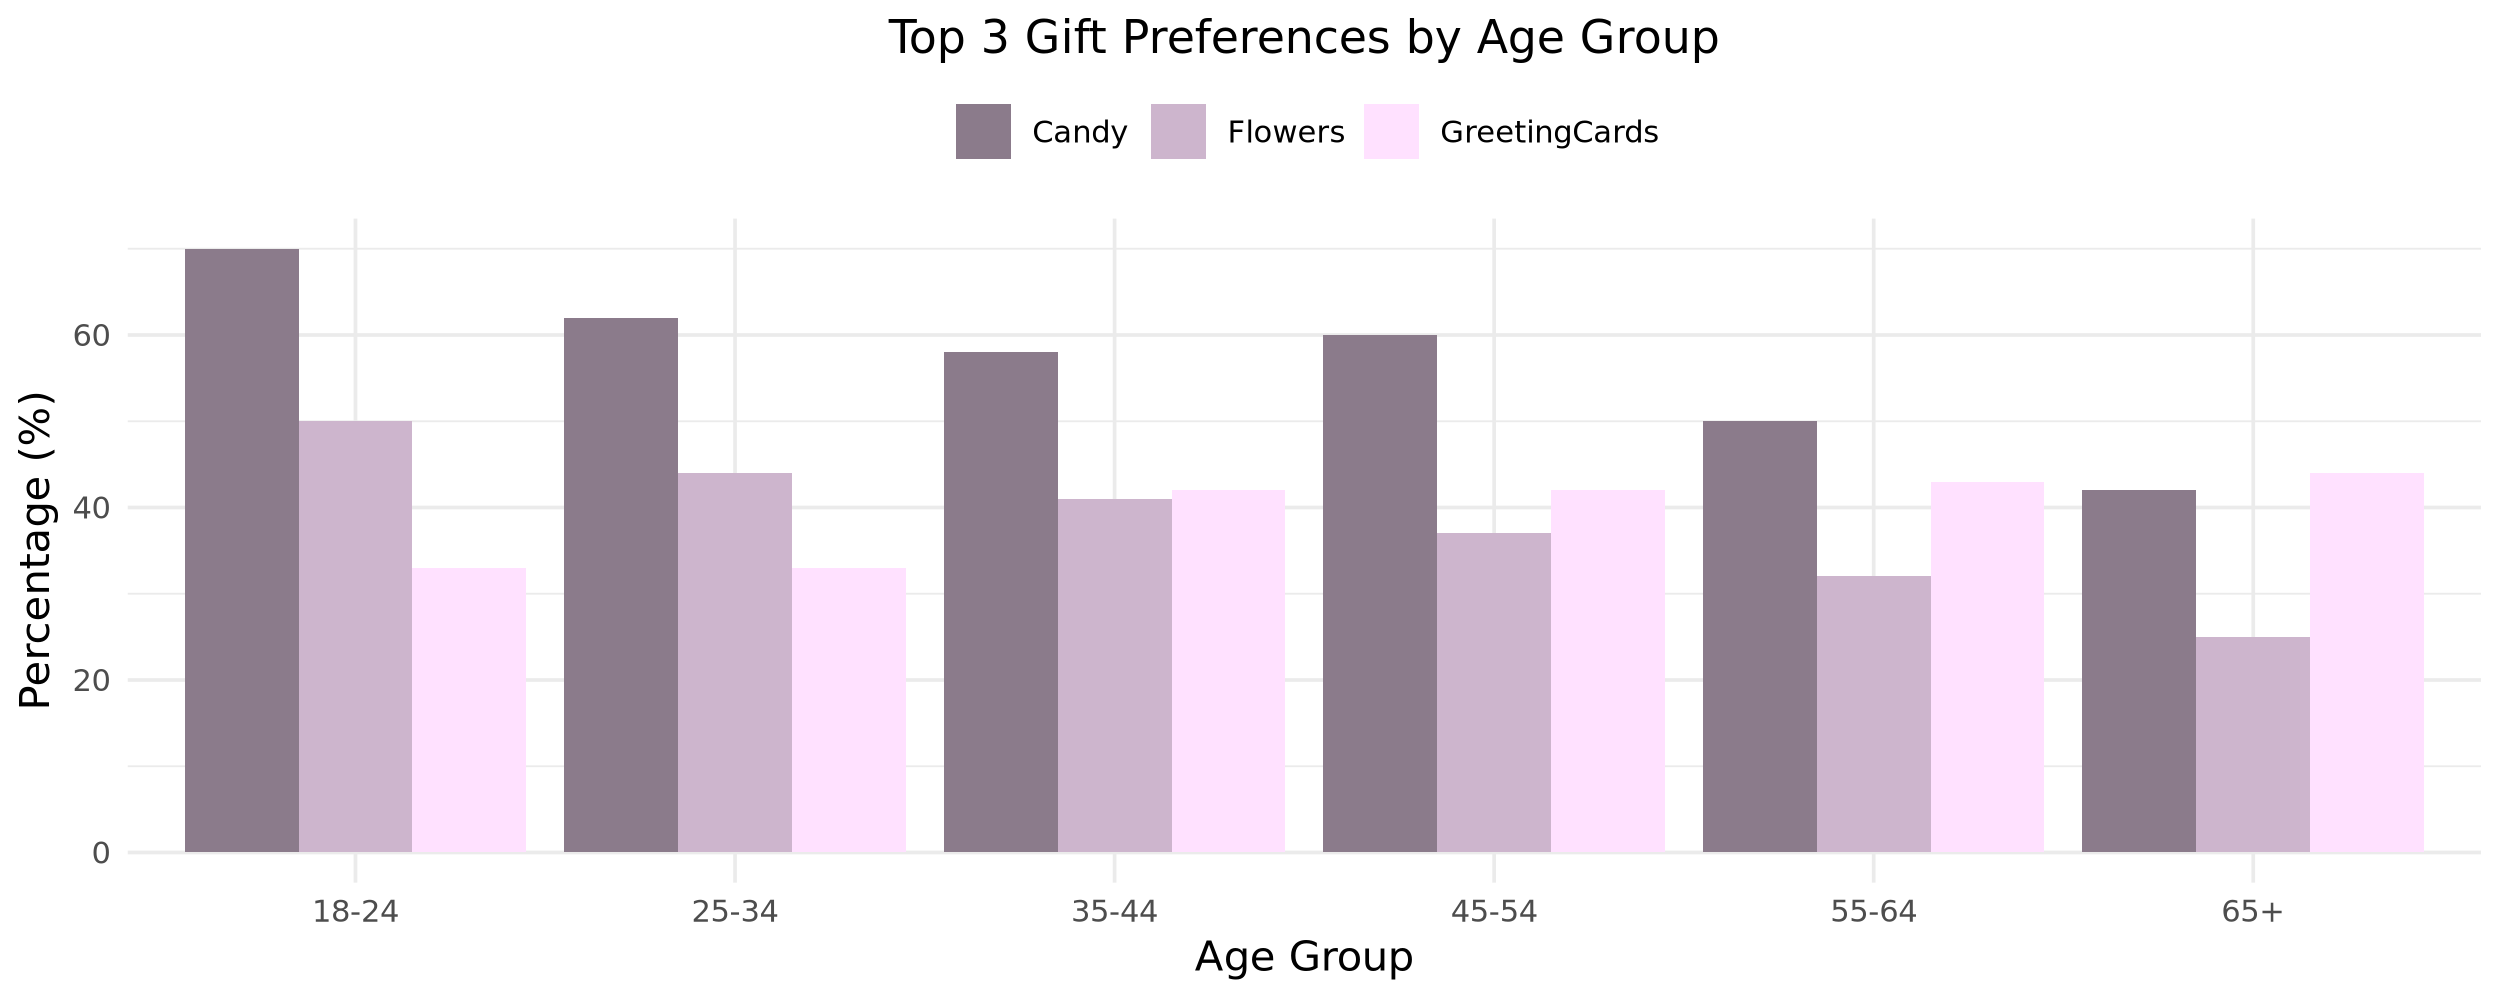

In [10]:
gifts_top3 |>
 select(-SpendingCelebrating)

options(repr.plot.height = 4)
gifts_top3 |>
  ggplot(aes(x = Age, y = Percentage, fill = GiftCategory)) +
  geom_bar(stat = "identity", position = "dodge") +  # Grouped bar chart
  labs(
    title = "Top 3 Gift Preferences by Age Group",
    x = "Age Group",
    y = "Percentage (%)"
  ) +
  scale_fill_manual(
    values = c(
      "Candy" = "thistle4",
      "Flowers" = "thistle3",
      "GreetingCards" = "thistle1"
    )
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),  # Center the title
    axis.title.x = element_text(size = 12),  # Customize x-axis title size
    axis.title.y = element_text(size = 12),  # Customize y-axis title size
    legend.position = "top",
    legend.title = element_blank()
  ) 


**The table shows the top 3 product categories by percentage spending for each age group with Candy, Flowers and Greeting Cards having top percentages but varying accross each age group as presented by the grouped bar chart**

In [11]:
gifts_gender <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-02-13/gifts_gender.csv',
                               show_col_types = FALSE)

In [12]:
gifts_gender

Gender,SpendingCelebrating,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Men,27,52,56,30,37,33,20,18
Women,27,59,19,14,43,29,24,24


In [13]:
gifts_gender_category <- gifts_gender |>
  pivot_longer(
    cols = Candy:GiftCards,
    names_to = "GiftCategory",
    values_to = "Percentage"
  )

In [14]:
gifts_gender_category

Gender,SpendingCelebrating,GiftCategory,Percentage
<chr>,<dbl>,<chr>,<dbl>
Men,27,Candy,52
Men,27,Flowers,56
Men,27,Jewelry,30
Men,27,GreetingCards,37
Men,27,EveningOut,33
Men,27,Clothing,20
Men,27,GiftCards,18
Women,27,Candy,59
Women,27,Flowers,19


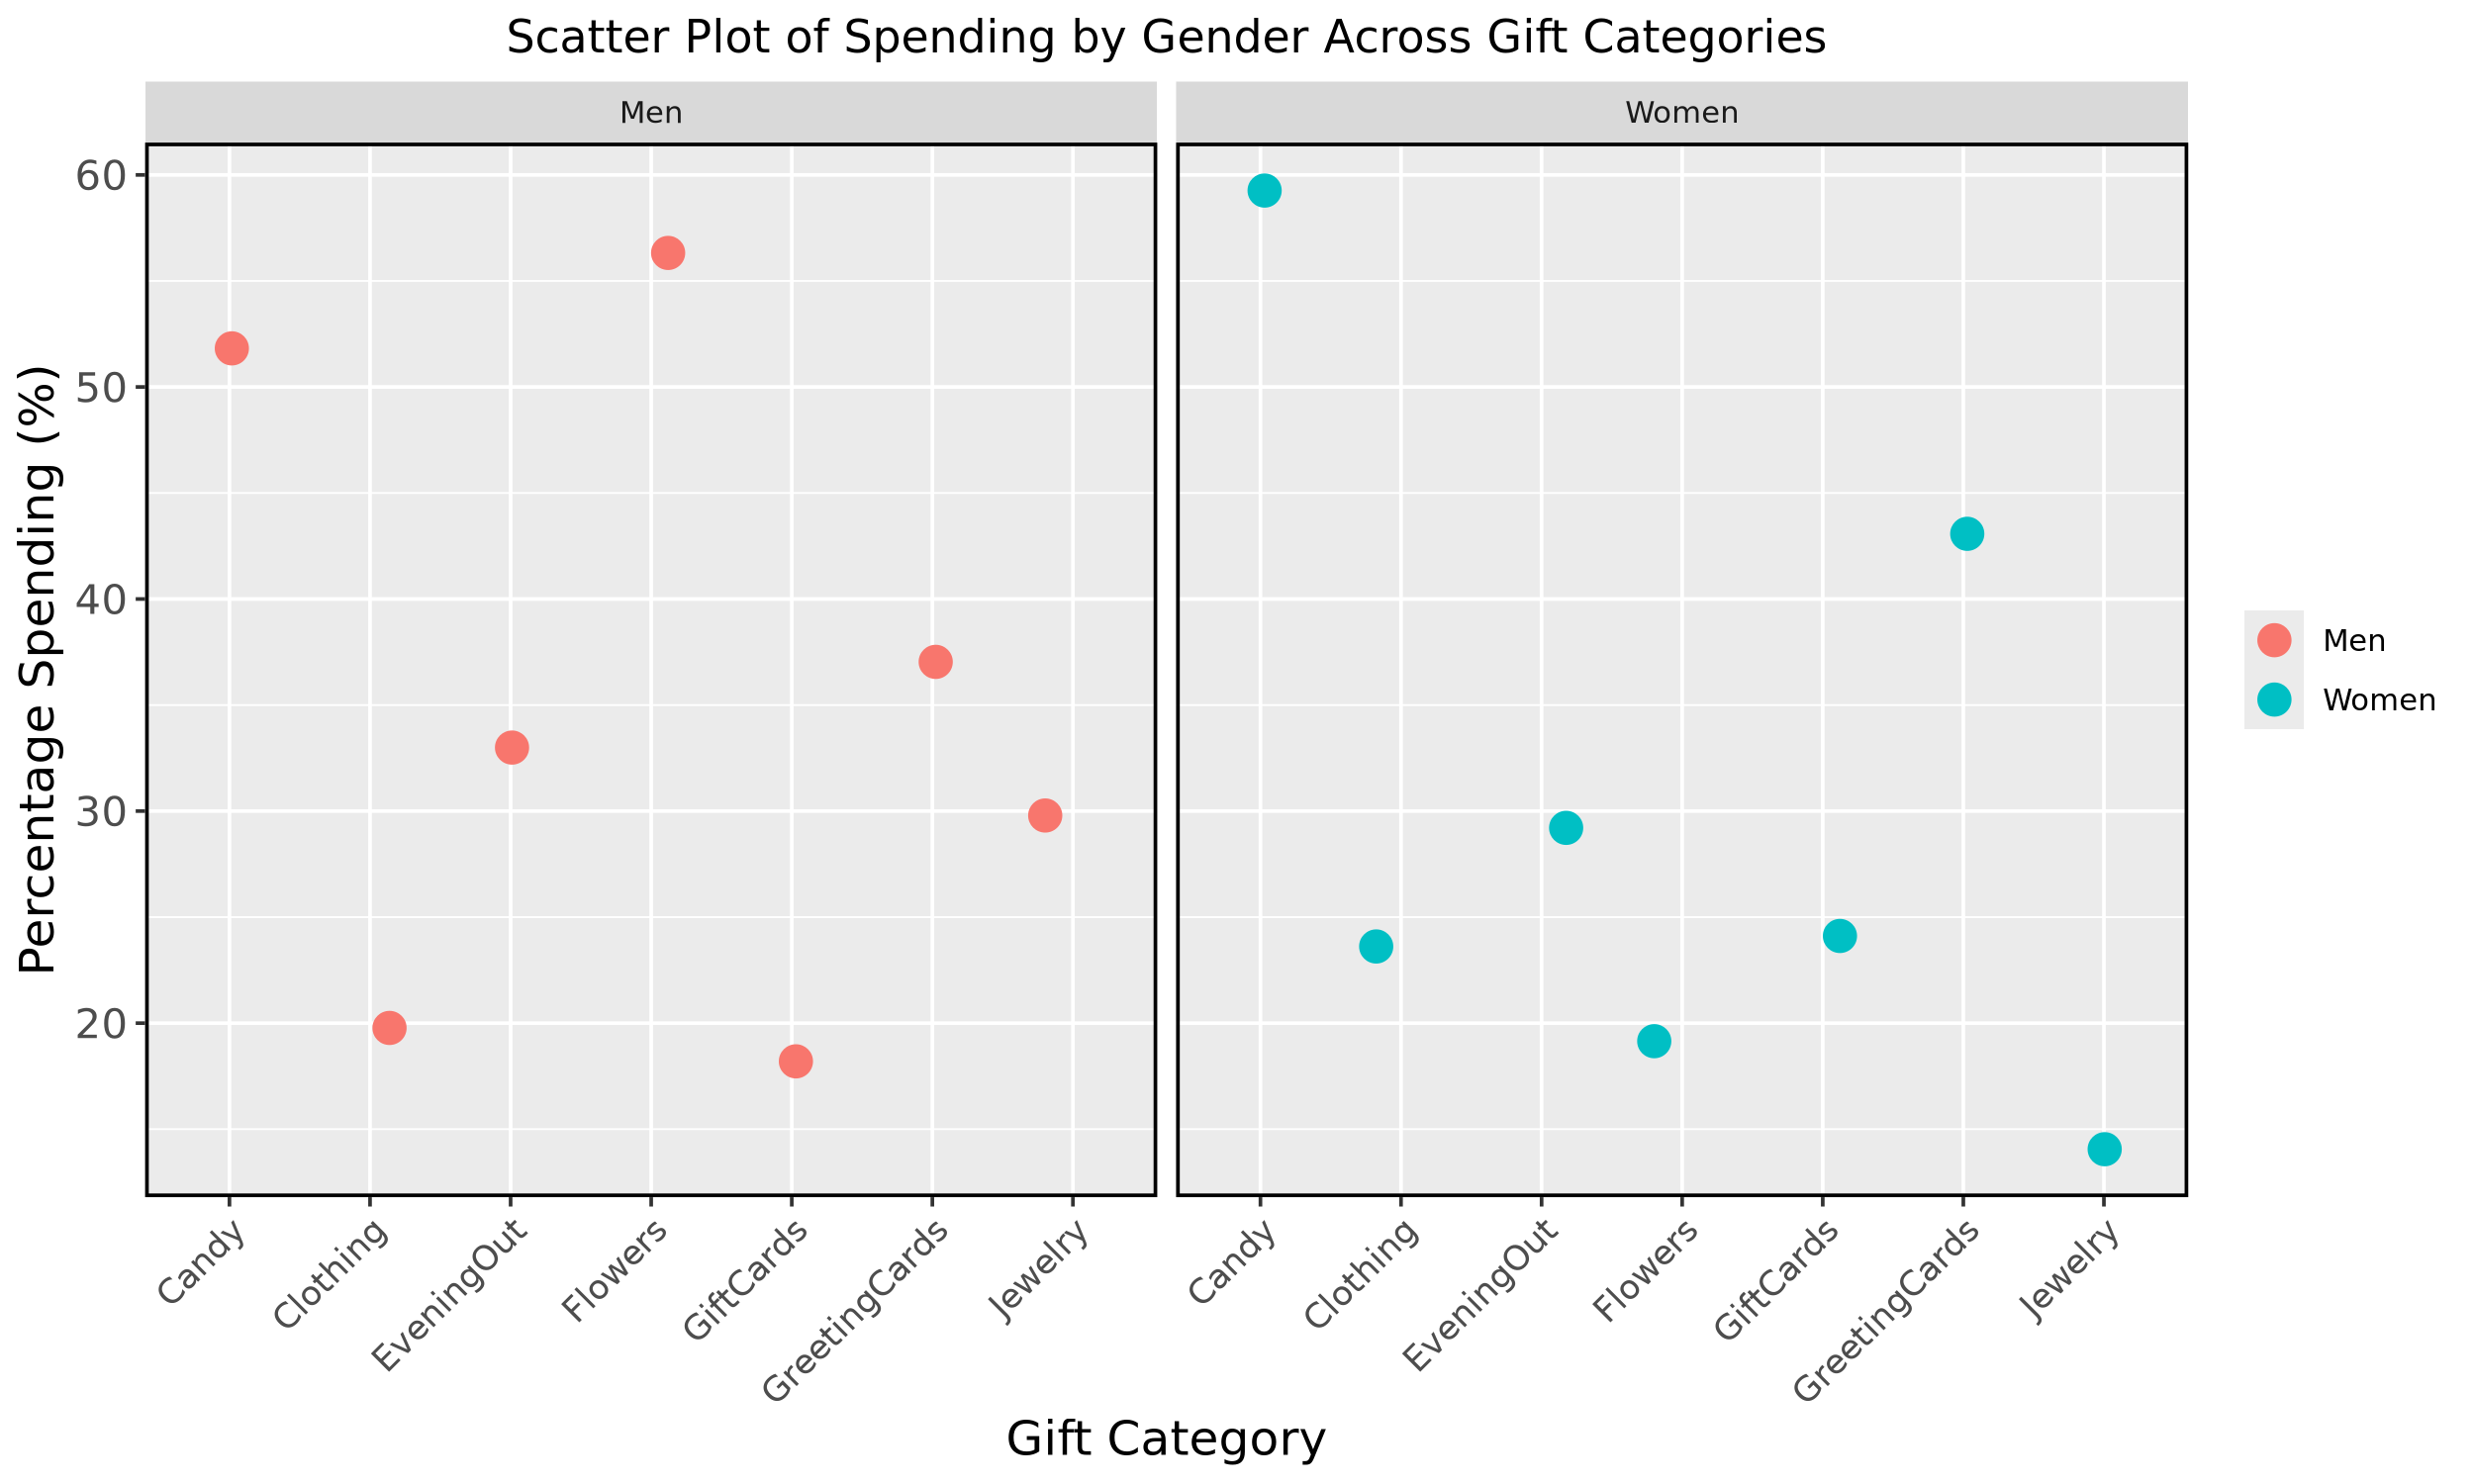

In [15]:
options(repr.plot.height = 6)
gifts_gender_category |>
  ggplot(aes(x = GiftCategory, y = Percentage, color = Gender)) +
  geom_point(size = 4, position = position_jitter(width = 0.2)) +  
  labs(
    title = "Scatter Plot of Spending by Gender Across Gift Categories",
    x = "Gift Category",
    y = "Percentage Spending (%)",
    color = NULL
  ) +
  facet_wrap(~Gender) + 
  #theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(size = 10, angle = 45, hjust = 1), 
    axis.text.y = element_text(size = 12),   
    axis.ticks = element_line(linewidth = 0.5),   
    axis.title.x = element_text(size = 14),  
    axis.title.y = element_text(size = 14),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1)  
  )


The scatter plot highlights gender differences in spending across gift categories:
For Men, the top 3 categories with high percentage spending are **flowers (56%), candy (52%), and jewelry (30%)** while for Women, the top 3 categories with high percentage spending are **candy (59%), greeting cards (43%), and gift cards (24%).**
***Candy*** is a popular category for both men and women